# Acquire, Explore and Visualize Data

This file is to just to demonstrate how to connect with Twitter API and scrape data. The main model is implemented using a pre-collected csv file which is provided in the data folder of this project.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import tweepy

### Understand how to connect with Twitter REST API

In [9]:
consumer_key = 'LNbihklRi4dcSthPBUNIxM114'
consumer_secret = 'bHBwRfSocseAbSVhMy6wwdvX0JwoWhGM92Brh2dWLMSLXSi7st'
access_token = '3866941996-A5uSTL1HnwIwkCUAD5PYt1TiXrpfwsRBgiZEbIP'
access_token_secret = 'mMBkqz7eYiRUe7lAIpXGN2QJbitJMZRwyH6NhxEJVfS0o'

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [3]:
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

### Search twitter for tweets which contain #Juventus and write data to a .csv file

In [7]:
Juventus_tweets = tweepy.Cursor(api.search, q="#juventus", lang='en').items(100)
import csv
with open('Juventus.csv', 'w', newline='', encoding = 'utf-8') as f:
    writer = csv.writer(f, delimiter=',')
    data = []
    for tweet in Juventus_tweets:
        data.append([tweet.created_at, tweet.text, tweet.user.screen_name])
    writer.writerows(data)

In [12]:
df = pd.read_csv('Juventus.csv')
df.head()

,Date,Tweet,User
0,3/3/2019 7:38,RT @Box_2_Box_: REVEALED!!! THE 10 PLAYERS WHO...,Emkay_Junior
1,3/3/2019 7:37,"RT @surebet247: 🔥🔥#20,000 #SerieA Promo\n\n⏩#N...",tuneckbaba
2,3/3/2019 7:32,Biggest matches for Sunday:\n\n#Everton vs #Li...,ReportFootball2
3,3/3/2019 7:17,@k.mbappe reaches 50 PSG goals in just 76 game...,Betensuredltd
4,3/3/2019 7:15,Comment down your score predictions.\n#NapoliJ...,flmotivation


### Create Wordcloud
Take all the sentences in the dataframe, tokenize to find the words, and get a frequency of count of each word

In [10]:
import nltk
from wordcloud import WordCloud
import spacy
from spacy.lang.en import English

In [13]:
parser = English()
text_list = df.Tweet.tolist()
text_string = ''.join(str(text_list))
parsedData = parser(text_string)
parsedData[0], parsedData[1], parsedData[2], parsedData[3], parsedData[4]

([, ', RT, @Box_2_Box, _)

In [14]:
tokens = []
lemmas = []
for i,token in enumerate(parsedData):
    if token.is_punct is False:
        tokens.append(token)
        lemmas.append(token.lemma_)

In [15]:
np.shape(tokens)

(1915,)

In [16]:
tokens[0], tokens[1], tokens[2], tokens[3], tokens[4], tokens[5]

(RT, @Box_2_Box, REVEALED, THE, 10, PLAYERS)

In [17]:
lemmas[0], lemmas[1], lemmas[2], lemmas[3], lemmas[4], lemmas[5]

('RT', '@Box_2_Box', 'REVEALED', 'THE', '10', 'PLAYERS')

In [18]:
frequency_words_token = {}

for token in tokens:
    if str(token) in frequency_words_token:
        count = frequency_words_token[str(token)]
        count = count + 1
        frequency_words_token[str(token)] = count
    else:
        frequency_words_token[str(token)] = 1

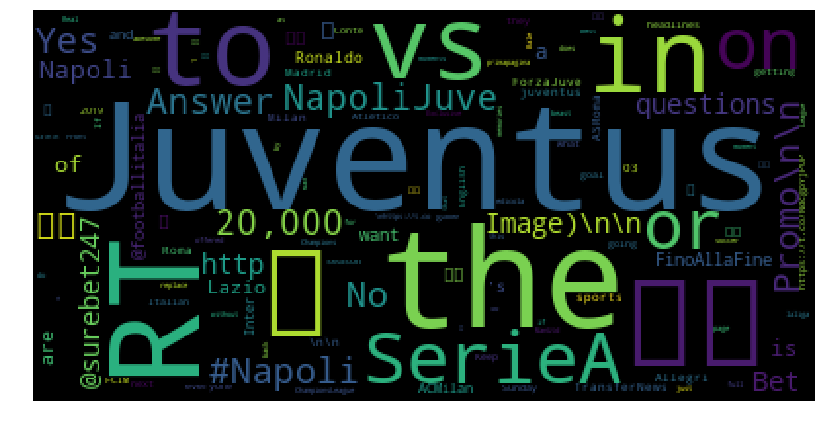

In [19]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency_words_token)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
freq = pd.DataFrame.from_dict(frequency_words_token, orient = 'index')
freq.sort_values(by = 0, ascending=False).head(50)

,0
Juventus,74
the,60
RT,51
⏩,46
🔥,46
to,35
in,33
vs,32
SerieA,28
on,28


### Stopword Removal

In [21]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yohannes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords

In [25]:
S_LIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS))
STOPLIST = list(S_LIST)
frequency_words_wo_stop = {}
for token in tokens:
    if str(token) not in STOPLIST:
        if str(token) in frequency_words_wo_stop:
            count = frequency_words_wo_stop[str(token)]
            count = count + 1
            frequency_words_wo_stop[str(token)] = count
        else:
            frequency_words_wo_stop[str(token)] = 1

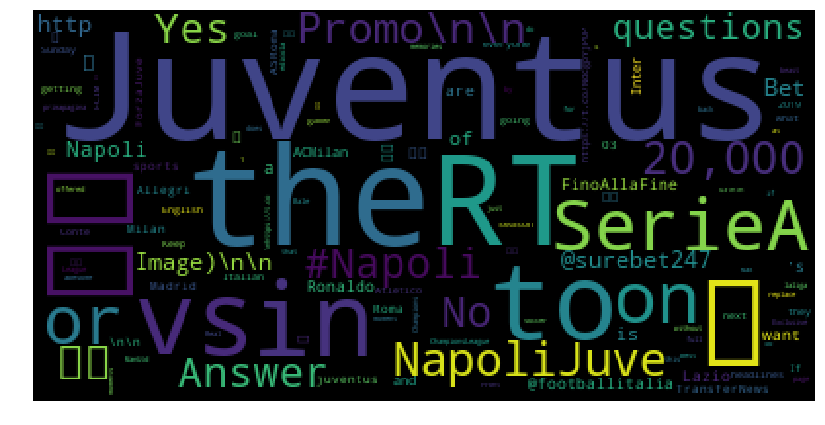

In [26]:
wordcloud.generate_from_frequencies(frequency_words_token)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
# Frequency count after removing stopwords
freq_w = pd.DataFrame.from_dict(frequency_words_wo_stop, orient = 'index')
freq_w.sort_values(by = 0, ascending=False).head(8)

,0
Juventus,74
RT,51
⏩,46
🔥,46
vs,32
SerieA,28
👉,24
NapoliJuve,24


In [28]:
#Frequency Count before removing Stopwords

freq.sort_values(by = 0, ascending=False).head(8)

,0
Juventus,74
the,60
RT,51
⏩,46
🔥,46
to,35
in,33
vs,32
